# Taller-3 Modelos de aprendizaje en python

Sebastian Felipe Valencia Velasco
201815565
 	
Andrés Francisco Borda
201729184


## Analisis y exploracion de los datos

In [4]:
#Importaciones

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\sebas\AppData\Local\Temp\ipykernel_22376\4193246737.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#Leer los datos y guardarlos en un dataframe
data = pd.read_csv('datos.csv', index_col=0)

In [6]:
#Ver el tamaño de los datos

print(data.shape)
data.head()


(414, 7)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Comportamiento de las variables

In [7]:
#Estadisticas descriptivas de las variables

data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


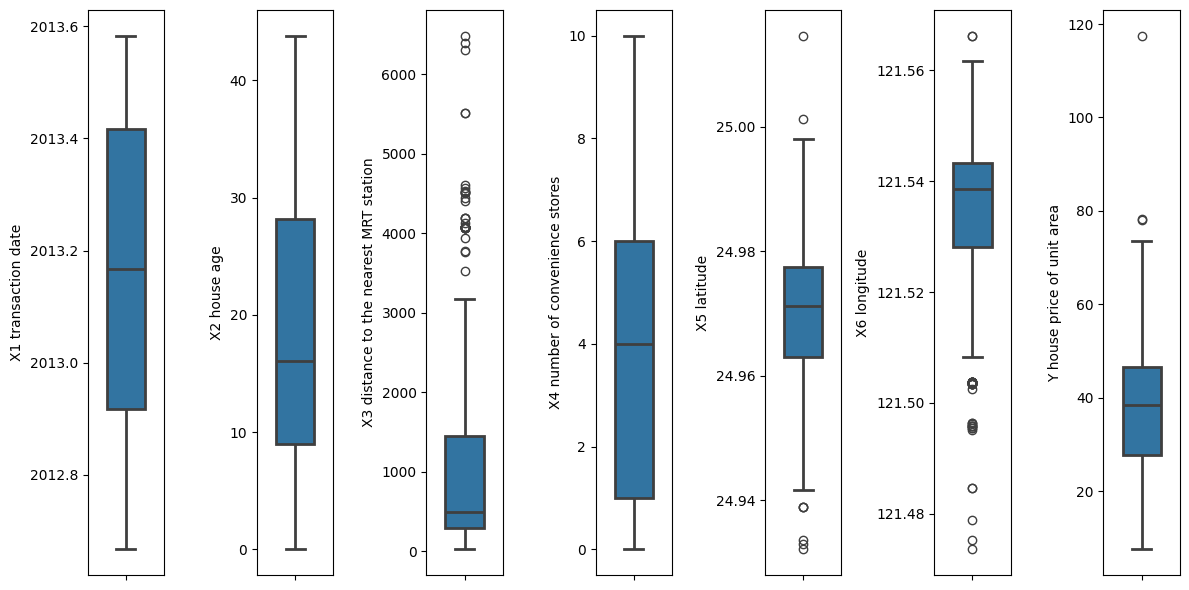

In [8]:
# Crear una visualizacion para las graficas
plt.figure(figsize=(12, 6))

# Sacar el numero de variables
num_variables = data.shape[1]

# Crear un boxplot para cada variable
for i in range(num_variables):
    plt.subplot(1, num_variables, i+1)
    sns.boxplot(y=data.iloc[:, i], width=0.5, linewidth=2)
    plt.ylabel(data.columns[i]) 

# Evitar que las graficas se sobrelapen
plt.tight_layout()

# Mostrar el plot
plt.show()

### Correlaciones entre las variables

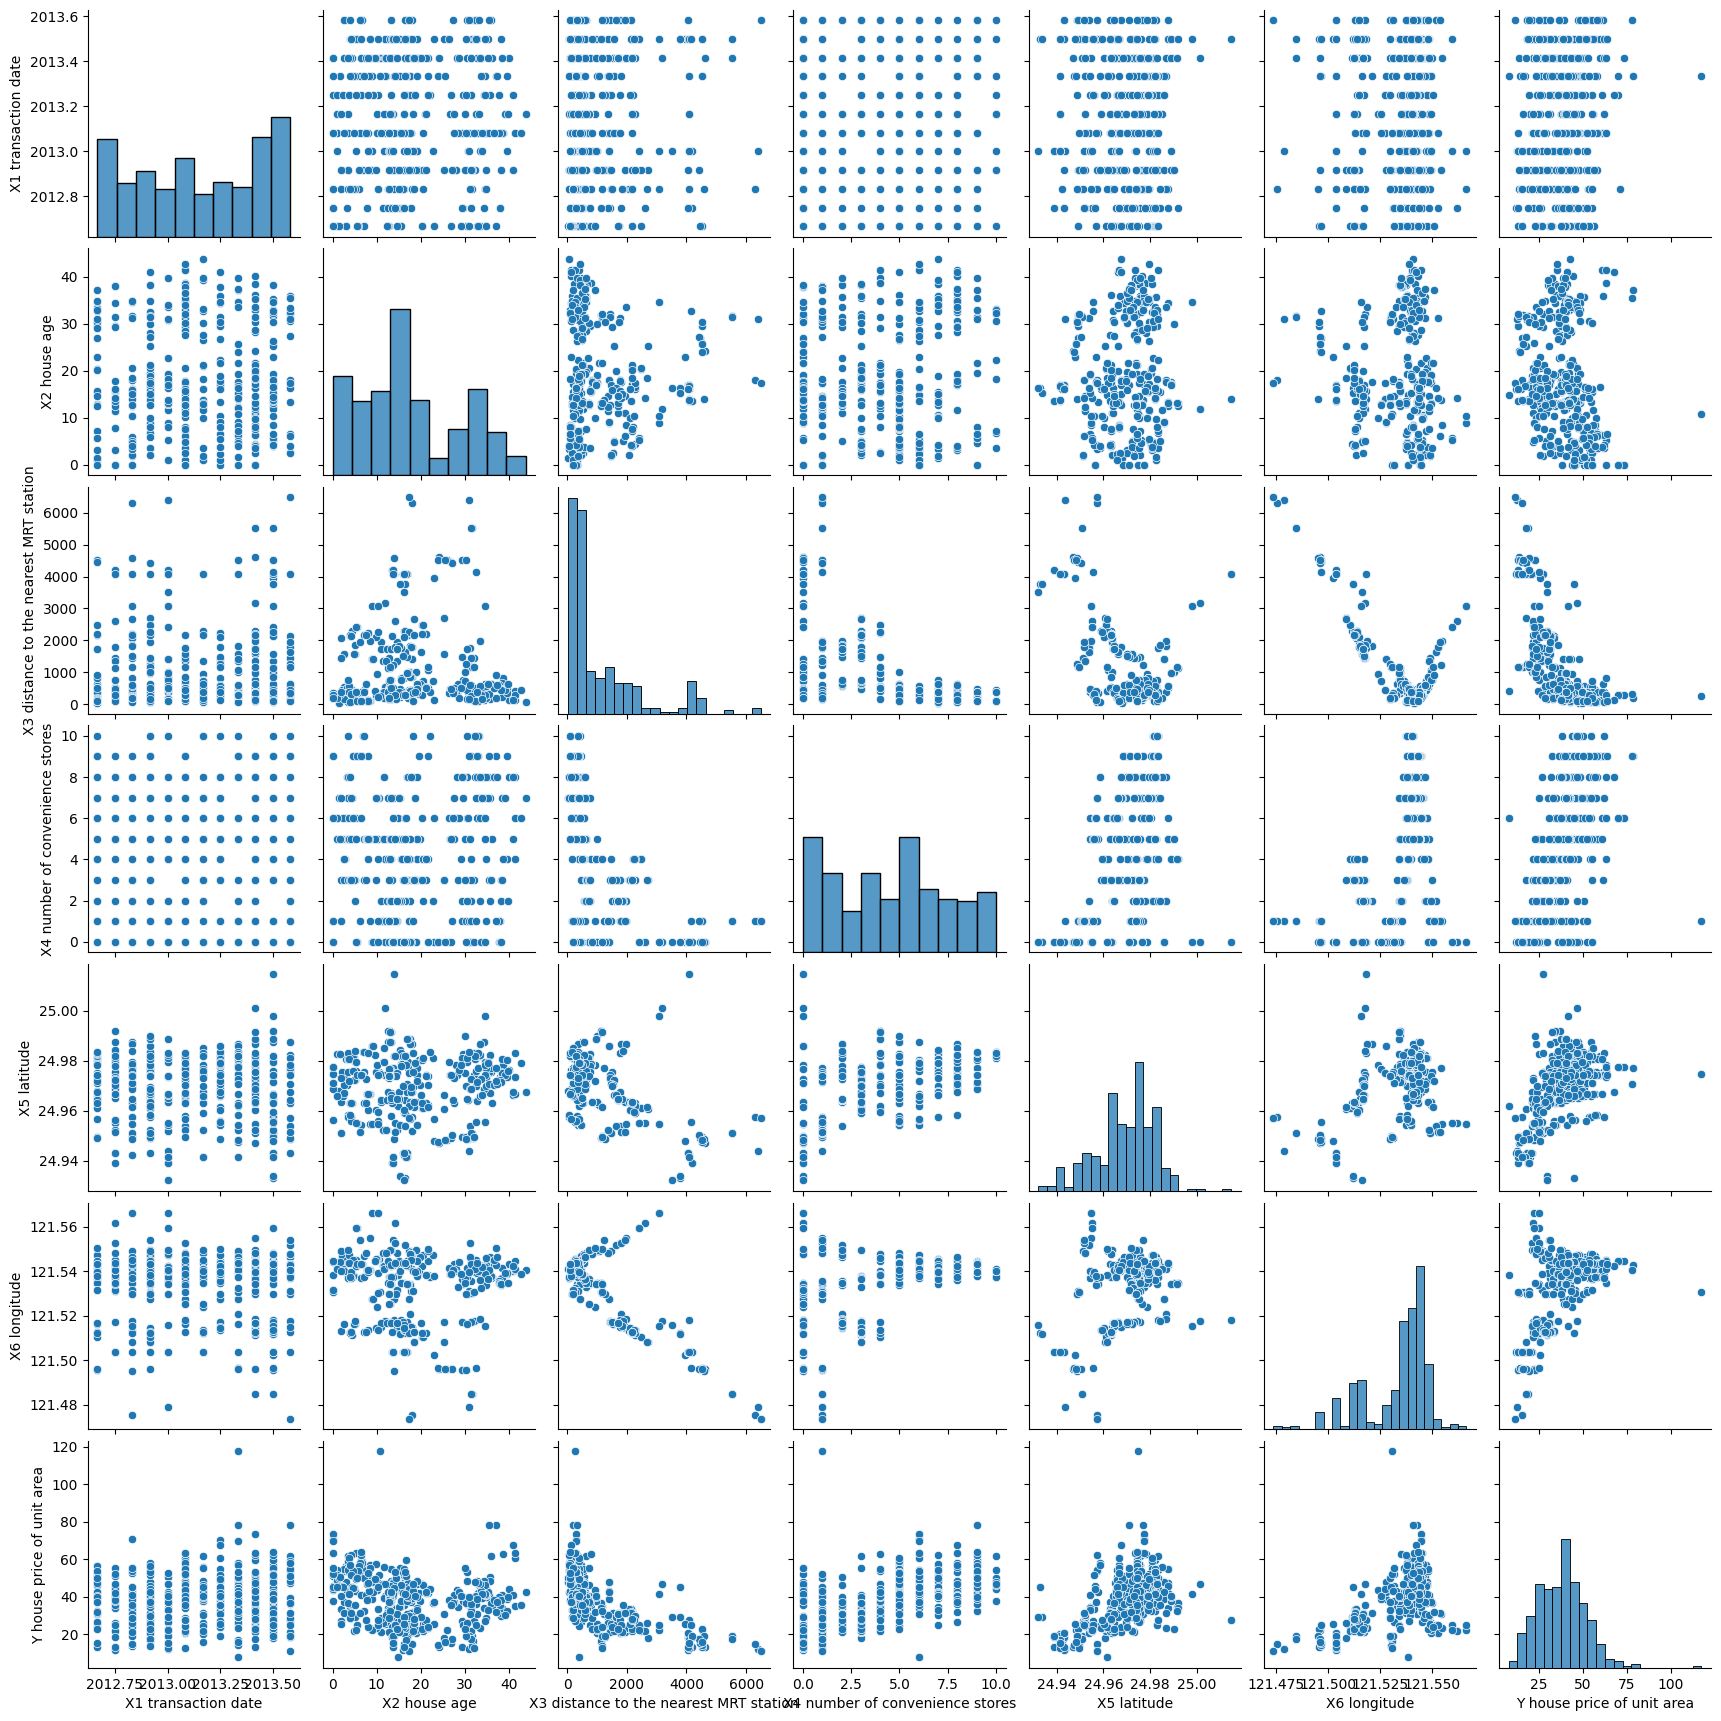

In [9]:
#Visualizacion de la relacion de las variables 

sns.pairplot(data,)

<Axes: >

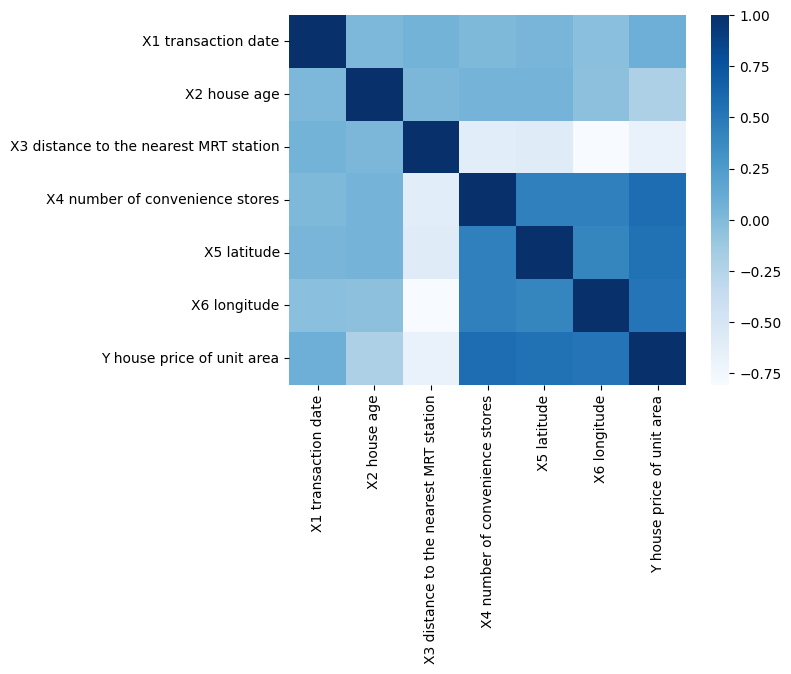

In [7]:
#Correlograma para la relacion entre las variables

corr = data.corr()
sns.heatmap(corr, cmap="Blues")

### Comparación bivariada de la variable de interes frente a las caracteristicas

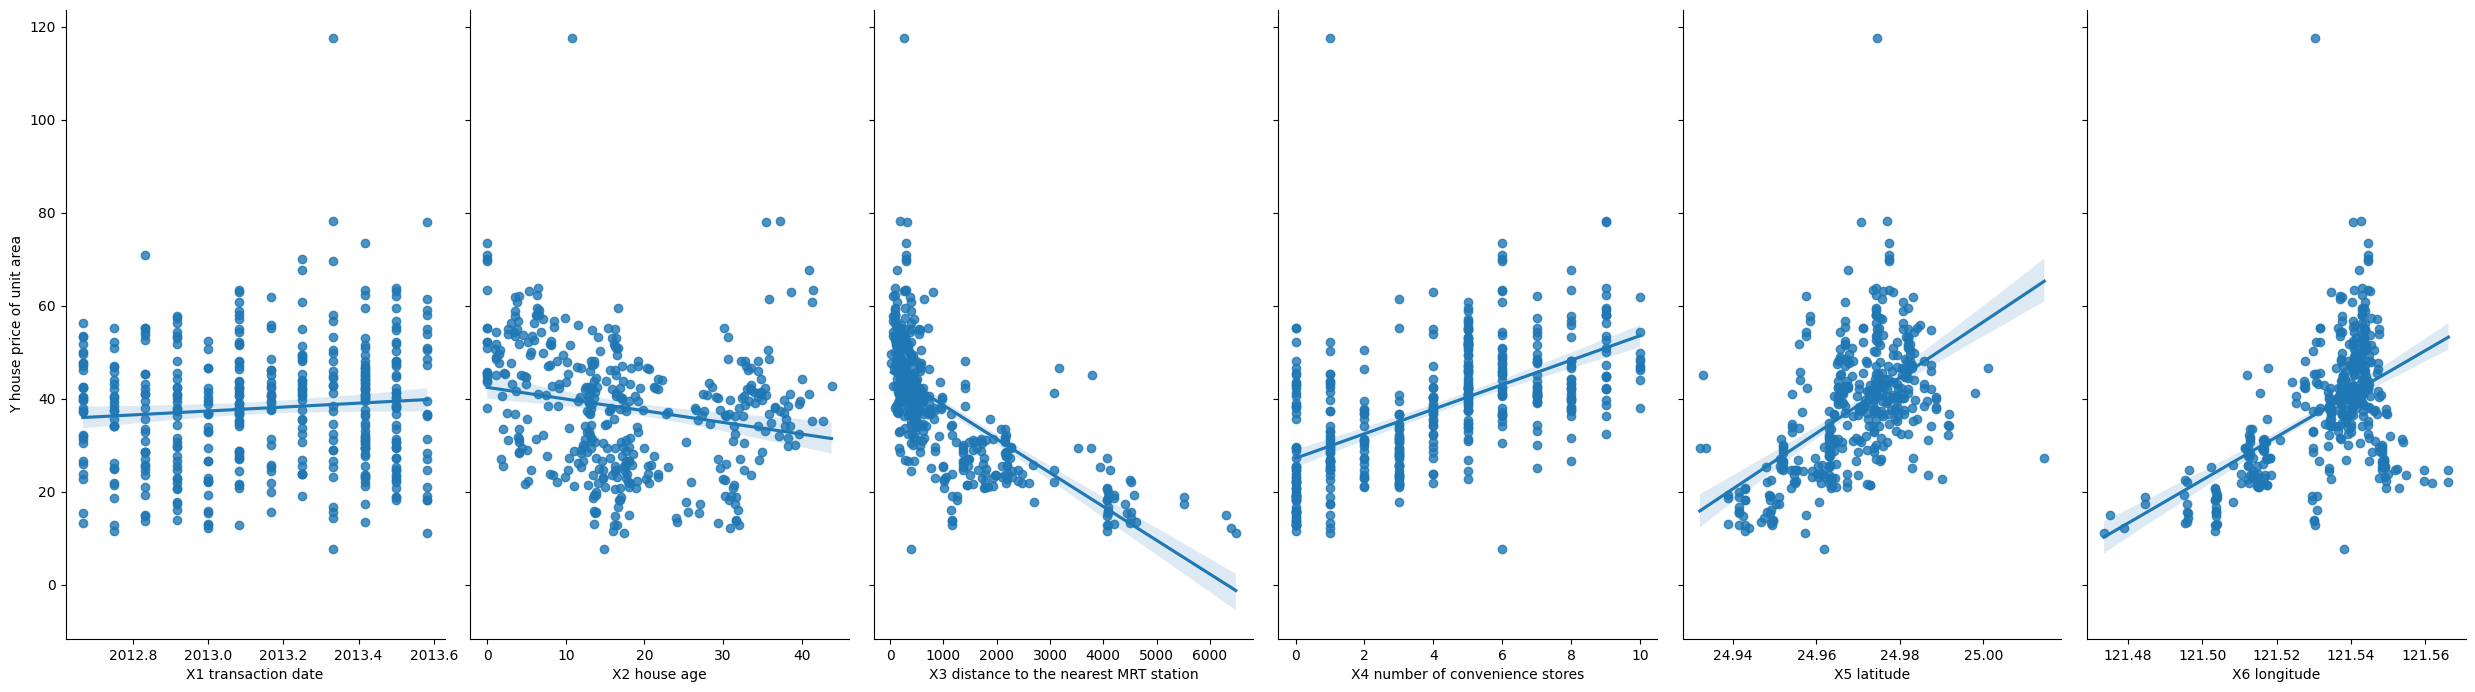

In [8]:
#Diagrama de dispersion con tendencia

sns.pairplot(data, x_vars= data.columns[:-1], y_vars='Y house price of unit area', height=7, aspect=0.6, kind='reg')

## Modelo lineal

### Creación del modelo

In [12]:
#Importaciones para crear el modelo lineal.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
# Eleccion de variables de interes
features = ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
# dataframe de características
X = data[features]

X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
No,,,
1,32.0,84.87882,10
2,19.5,306.59470,9
3,13.3,561.98450,5
4,13.3,561.98450,5
5,5.0,390.56840,5


In [11]:
# variable de respuesta
y = data['Y house price of unit area']

y.head()

No
1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: Y house price of unit area, dtype: float64

In [12]:
#Separacion entre datos de train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# tamaños 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(331, 3)
(331,)
(83, 3)
(83,)


In [13]:
# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

# imprimir coeficientes
print(linreg.intercept_)
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

43.0269376337089


[('X2 house age', -0.22831885553619688),
 ('X3 distance to the nearest MRT station', -0.0053706214004605665),
 ('X4 number of convenience stores', 1.286069807548099)]

### Utilizar el modelo para la prediccion

In [14]:
y_pred = linreg.predict(X_test)

y_pred

array([33.70239435, 49.45253668, 24.46318192, 17.53373678, 42.84137984,
       33.0203966 , 31.02399119, 38.92433597, 38.38747312, 13.17151555,
       14.42627631, 41.68213859, 32.40605306, 46.76129128, 52.7686794 ,
       33.1757911 , 42.84137984, 42.61195567, 31.27225116, 44.27316291,
       51.26424902, 30.20432015, 42.33376259, 48.29855043, 45.41276319,
       32.60471417, 33.58282052, 46.95368103, 46.21809739, 17.29105563,
       35.27163415, 34.52306632, 39.19097185, 47.04500858, 48.37058182,
       17.37942883, 40.79129413, 38.75064645, 33.41953891, 17.46524112,
       40.8039878 , 29.58706708, 52.6088562 , 34.43912813, 33.38737029,
       37.41197628, 32.35508527, 40.57815211, 42.9137486 , 33.19448199,
       17.40226072, 43.49533372, 46.67678409, 17.9760122 , 52.78109764,
       46.0229027 , 42.84137984, 38.55692421, 39.15768216, 43.86838548,
       29.50812294, 40.49966006, 33.58569379, 17.37942883, 38.75963928,
       43.74691456, 41.71976928, 47.47978674, 17.99884408, 37.97

### Metricas del modelo

In [15]:
#Importacion de metricas de evaluacion
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [16]:
# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  5.475527486473668
MSE:  48.353564489825516
RMSE:  6.9536727338742015


### Metricas utilizando validacion cruzada

In [17]:
#Evaluacion del modelo con validacion cruzada
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)

[ 60.87595717  90.87917772  64.41551856 147.23299496  62.75282893]


In [18]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 7.80230461  9.5330571   8.02592789 12.1339604   7.92166832]


In [19]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

9.08338366392503


### Evaluación con pruebas estadisticas

In [14]:
#Utilizando statsmodel
import statsmodels.api as sm


In [21]:

X = data[features]
y = data['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.505
Model:                                    OLS   Adj. R-squared:                  0.500
Method:                         Least Squares   F-statistic:                     111.1
Date:                        Mon, 12 Feb 2024   Prob (F-statistic):           1.33e-49
Time:                                22:34:42   Log-Likelihood:                -1222.0
No. Observations:                         331   AIC:                             2452.
Df Residuals:                             327   BIC:                             2467.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

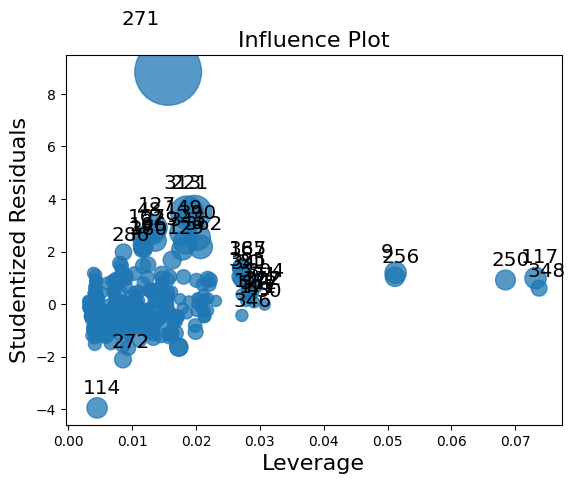

In [22]:
#Creacion de influence plot
fig = sm.graphics.influence_plot(model, criterion="cooks")

In [23]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.012084592145015106
Index([380, 390, 165, 229, 313, 271,  17, 106,   9, 362, 345, 129, 250,  48,
       114, 117, 221, 149, 167, 127, 387, 256],
      dtype='int64', name='No') 
 [0.01323318 0.0327626  0.01305496 0.01999116 0.05566029 0.25072124
 0.01375386 0.01496212 0.0191562  0.02484993 0.02557985 0.01952719
 0.01553029 0.0245316  0.01684315 0.01929198 0.0594637  0.03332777
 0.01873837 0.02830332 0.01325398 0.01454546]


In [24]:
#Determinar outliers factores
X_train[out_d]

,const,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
No,,,,
380,1.0,0.0,292.9978,6
390,1.0,40.9,122.3619,8
165,1.0,0.0,185.4296,0
229,1.0,11.9,3171.3290,0
313,1.0,35.4,318.5292,9
271,1.0,10.8,252.5822,1
17,1.0,0.0,292.9978,6
106,1.0,0.0,292.9978,6
9,1.0,31.7,5512.0380,1


In [25]:
#Determinar outliers variable de interes
y_train[out_d]

No
380     69.7
390     67.7
165     55.2
229     46.6
313     78.0
271    117.5
17      70.1
106     71.0
9       18.8
362     63.3
345     41.2
129     60.7
250     15.0
48      61.5
114      7.6
117     12.2
221     78.3
149     45.1
167     73.6
127     62.9
387     55.3
256     17.4
Name: Y house price of unit area, dtype: float64